In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

- 가중치의 예시

- 영화 평점에 대한 가중치라고 하면?
- 세 개의 평점이 5.0, 7.0 9.5 = 간단한 세 개의 평균

- 거리 기반으로 가중치 계산을 하게 되면 
- 가중치가 들어가서 평균을 잡게 되면 다른 평균값이 나온다.
- 그 가중치가 내가 어디쪽에 더 가까운지에 따라 그 특정 평점에 높게 나타날 것

In [2]:
(5.0+7.0+9.5)/3

7.166666666666667

- KNN의 한계로 보면 기존 데이터를 벗어나느 경우는 동일하게 예측하게 된다.

In [4]:
x1 = np.arange(1,11)
x = x1.reshape(-1,1)
y = np.arange(1,11)*5

In [5]:
x1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
y

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

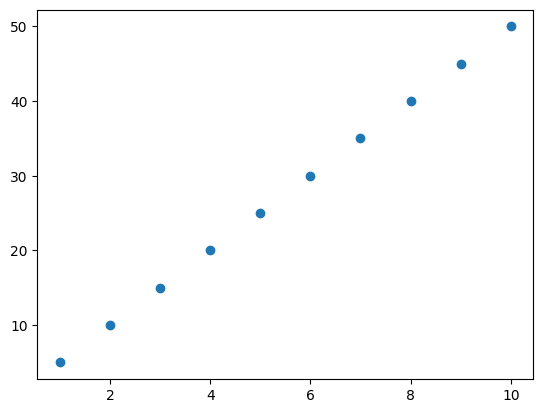

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)

In [12]:
#빠르게 knn을 학습
knn_re=KNeighborsRegressor(n_neighbors=2).fit(x,y)

In [18]:
print(knn_re.predict([[5]]))#비슷하게 예측

[22.5]


In [19]:
print(knn_re.predict([[8]]))#비슷하게 예측

[37.5]


In [20]:
print(knn_re.predict([[10]]))#Knn 한계 예시

[47.5]


In [21]:
print(knn_re.predict([[12]]))#Knn 한계 예시

[47.5]


In [22]:
print(knn_re.predict([[15]]))#Knn 한계 예시

[47.5]


# KNN
- **n_neighbors** : 이웃 수, k의 값
- **weights**: 이웃의 가중치 결정방법, 디폴트 'uniform' 동일한 가중치, 'distance' 거리의 반비례 가중치
- **metric** : 거리측정방식, 'euclidean', 'manhanttan' 방식
- **algorithm** : 거리 기반으로 어떻게 탐색할 것인가?
    - 'auto' : 가장 적정한 것 골라서 데이터 차원,패턴에 따라서 자동을 탐색하는 것
    - 'ball_tree' : 필요한 부분 빠르게 탐색하기 위한 방법
    - 'kd_tree' : 데이터 구조, 분할방식으로 차원 축소하면서 진행하는 방법
    - 'brute' : 완전탐색방식 가장직관적인 방법, 데이터 크면 계산이 증가한다.

In [23]:
#가중치에 따른 실제 학습은 어떤 식으로 바뀌는지?
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

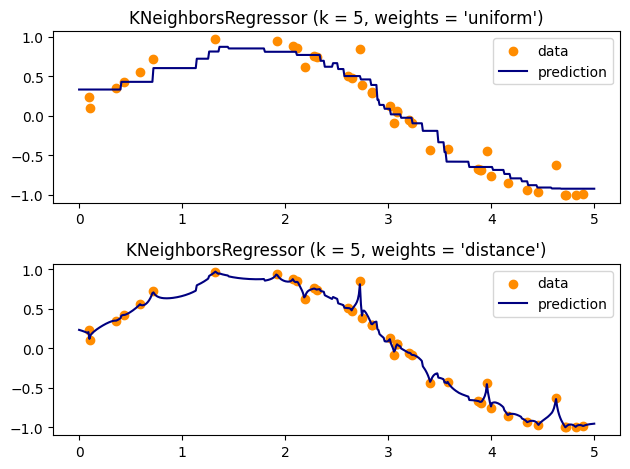

In [24]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [25]:
#Knn 회귀, 분류, 이상치 탐지 등
from sklearn.neighbors import KNeighborsRegressor
#캘리포니아 데이터를 가지고 진행


X,y = fetch_california_housing(return_X_y=True)

In [26]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [28]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [31]:
# train,test로 나누고 진행하기!

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

# k값에 따라 값이 변경이 될 것
# k값에 따른 MSE 가장 낮은 것을 탐색해 보기
# 적정한 K가 어디인지를 ?

k_values = range(1,20)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse_scores.append(-scores.mean())
    
#MSE 가장 낮은 k 값  찾기

optimal_k = k_values[mse_scores.index(min(mse_scores))]
print(f'Optimal K: {optimal_k}')


Optimal K: 9


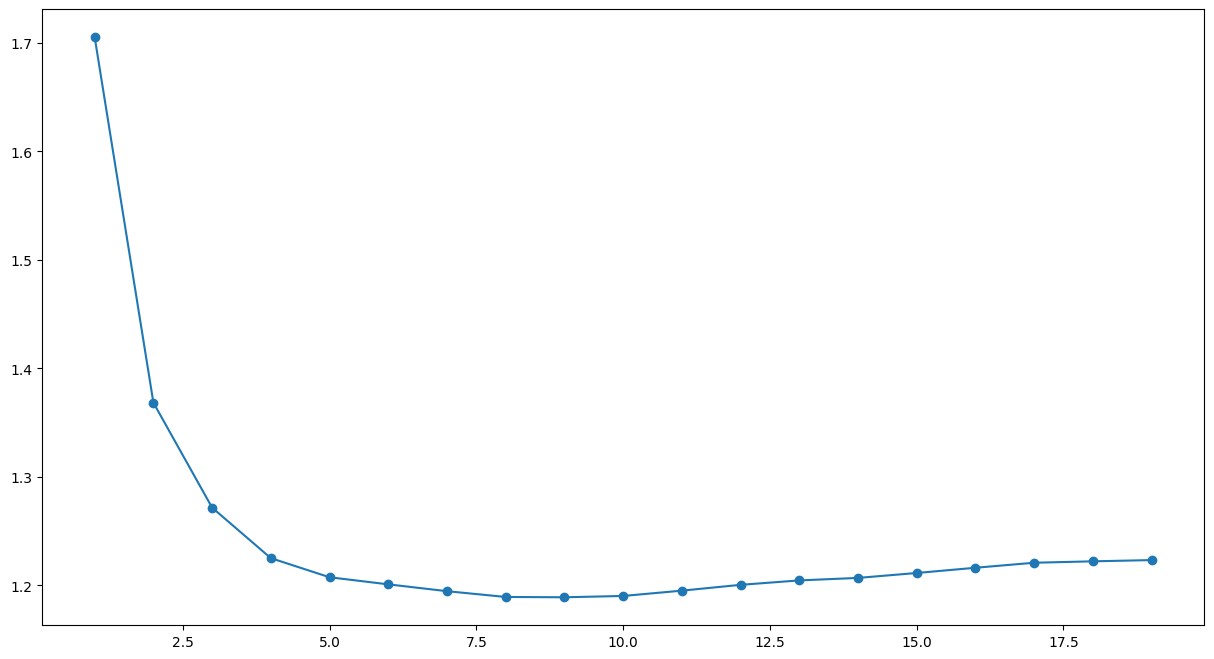

In [32]:
# MSE 간단한 시각화를 통해 살펴보자!

plt.figure(figsize=(15,8))
plt.plot(k_values, mse_scores, marker='o')

- 적정 k수가 지나고 난 후에 점점 MSE 증가하는 현상
- 왜 그럴까?
- 과적합하여 -> 불필요한 패턴까지 배워서 
- K가 증가하면, 모델이 학습데이터의 패턴을 충분히 학습을 하지 못하는 경우, 너무 단순한 모델이 된다. 과소적합의 개념 일반화를 못하는 경우
- K가 증가하면, 이상치 영향으로 인해서 MSE 값이 올라갈 수 있다. ( 서민이 사는 집에 부유한 사람이 사는 집의 가격 까지 들어가면-> 집값 평균 올라간다. 일반화 하기 어렵다.)

## KNN분류

In [36]:
# KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

# iris데이터로 분류 작업 진행

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [37]:
knn_clf=KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_clf.fit(X_train,y_train)

y_pred = knn_clf.predict(X_test) # 예측값 

In [42]:
print('정확도', accuracy_score(y_test, y_pred))

정확도 0.9555555555555556


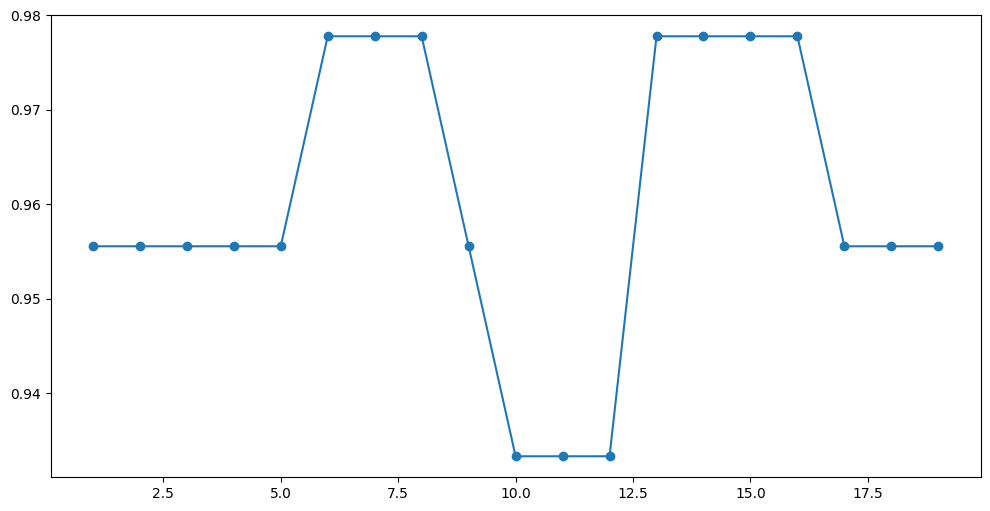

In [44]:
# K값에 따라서 어떻게 변화하는가?

k_range = range(1,20)
scores = []

for k in k_range:
    knn = knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure(figsize=(12,6))
plt.scatter(k_range, scores)
plt.plot(k_range, scores)

In [45]:
scores

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

Optimal K: 6


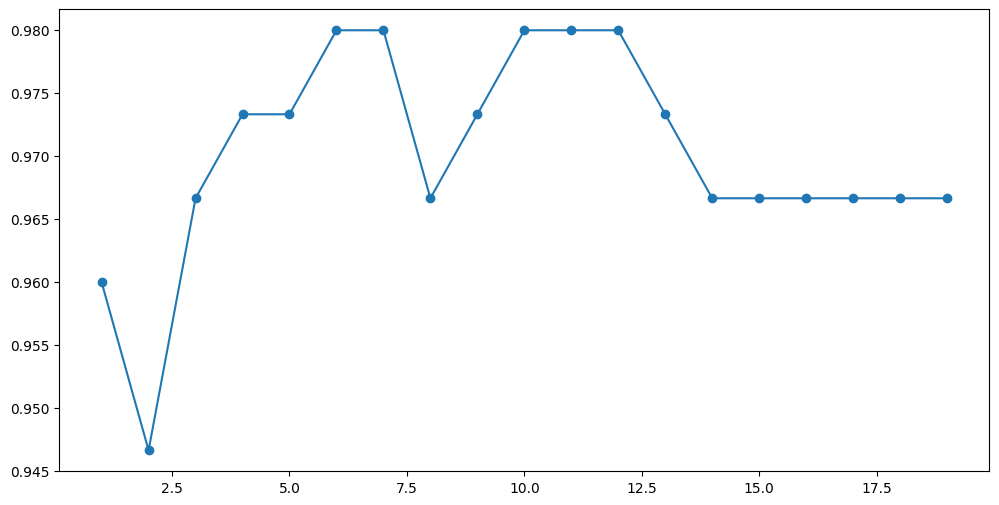

In [49]:
#교차검증 동일하게 진행

# K값에 따라서 어떻게 변화하는가?

k_range = range(1,20)
cv_scores = []

for k in k_range:
    knn = knn_clf=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

    
optimal_k = k_range[cv_scores.index(max(cv_scores))]
print(f'Optimal K: {optimal_k}')

    
plt.figure(figsize=(12,6))
plt.plot(k_range, cv_scores, marker='o')
#plt.plot(k_range, scores)

In [51]:
# 간단한 그리드서치로 최적을 찾기
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터
param_grid = {'n_neighbors':range(1,20),'weights':['uniform','distance']}

#grid_search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
# 그리드서치 수행
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
#최적의 하이퍼파라미터
print('최적의 하이퍼 파라미터:', grid_search.best_params_)
print('최적의 스토어:', grid_search.best_score_)


최적의 하이퍼 파라미터: {'n_neighbors': 5, 'weights': 'uniform'}
최적의 스토어: 0.980952380952381


## 이상치 탐지

In [54]:
from sklearn.neighbors import NearestNeighbors

In [57]:
# 캘리포니아 데이터를 통해 이상치를 한 번 탐지해 보자!

cal = fetch_california_housing()
X= cal.data
y= cal.target

In [62]:
## MedInc 집값 컬럼 0번째 컬럼 
X_MedInc = X[:,0].reshape(-1,1) # 집값 데이터만 추출

#Knn 모델로 이웃이 5개 거리 계산해서 이상치 탐지해보자
nbrn = NearestNeighbors(n_neighbors = 5, algorithm='ball_tree').fit(X_MedInc)

In [64]:
distance, indices = nbrn.kneighbors(X_MedInc)

In [68]:
# 거리기준으로 이상치 점수 계산해서 
outlier_scores = distance[:,-1] # 가장 먼 이웃까지의 거리

In [70]:
# 이상치 점수가 특정 임계값을 넘으면 이상치로 판단
# 상위 5% 이상치 간주하자!
thres = np.percentile(outlier_scores, 95)
is_outlier = outlier_scores > thres

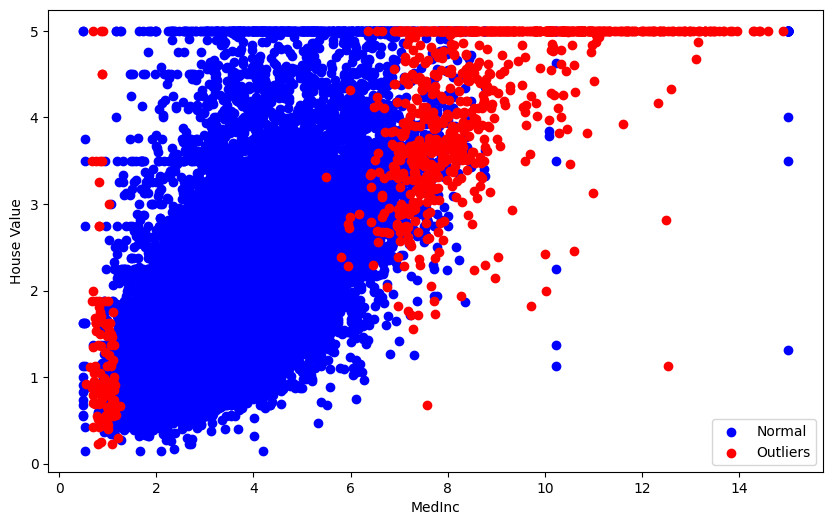

In [72]:
## outlier 시각화 하기

plt.figure(figsize=(10,6))
plt.scatter(X_MedInc[~is_outlier], y[~is_outlier], color='blue', label= 'Normal')
plt.scatter(X_MedInc[is_outlier], y[is_outlier], color='red', label= 'Outliers')
plt.xlabel('MedInc')
plt.ylabel('House Value')
plt.legend()